# Analyse pandas files

Purpose detection of bad files

work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/04/04
- last update : 2023/04/04


In [1]:
import h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
import seaborn as sns
sns.set_style("ticks",{'axes.grid' : True})

In [4]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from astropy.time import Time
import astropy.units as u

In [6]:
DateToRuncollection = {

 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
      
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very bad spectra
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  nice spectra
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # nice
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48",
 20221208 :  "u/dagoret/BPS_manyspectro_v49",
 20221209 :  "u/dagoret/BPS_manyspectro_v50", 
 20221210 :  "u/dagoret/BPS_manyspectro_v51", 
 20221212 :  "u/dagoret/BPS_manyspectro_v52",    
    
 #January 2023
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # missing for moment
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment


 # february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42",
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors 
 20230228 :  "u/dagoret/BPS_manyspectro_v70",   
 
 # march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", 
 20230302 :  "u/dagoret/BPS_manyspectro_v72", 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors   
    
}

In [7]:
DATE = 20230316
filterdispersername = "empty~holo4_003"

In [8]:
configmode = "PSF2DFFM_REBIN2"
specver="specV2.4"

In [9]:
input_summary_file = f"fullsummaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
input_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

In [10]:
input_summary_file

'fullsummaryspectra_20230316-empty~holo4_003-PSF2DFFM_REBIN2-specV2.4-oga.csv'

# Read pandas file

In [11]:
df=pd.read_csv(input_summary_file,index_col=0)

In [12]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms
0,0,2023031600465,2023-03-17T06:20:56.082001145Z,HD185975,empty,2.034006,0,0,0,-107.983587,-109.385149,-69.962103,1,HD185975,-0.000065,holo4_003,0.474013,187.313525,0.0,-109.385149,149.958439,889.761747,597.257159,9.122968e-02,1.526907e+00,192.753849,20.028355,1.0,2.034006,6.733709,2.4,2,2023-03-17T06:20:56.082001145Z,30.0,2.034006,-87.420358,-107.983587,0,0,0,empty,-69.962103,-418.451890,83.761747,568,1704,806,991,1136,185,2,22666.666667,-418.451890,83.761747,568,1704,806,991,2,22666.666667,1136,185,0.015520,0.013880,0.103779,0.013527,0.013880,0.000141
1,1,2023031600466,2023-03-17T06:21:39.074005228Z,HD185975,empty,2.033523,0,0,0,-107.803713,-109.206969,-69.962194,1,HD185975,-0.000065,holo4_003,0.497997,187.466963,0.0,-109.206969,148.346522,888.563558,597.257159,-7.873038e-02,5.184269e-02,368.049307,12.354948,1.0,2.033523,6.070717,2.4,2,2023-03-17T06:21:39.074005228Z,30.0,2.033523,-87.420352,-107.803713,0,0,0,empty,-69.962194,-417.579826,83.563558,566,1703,805,990,1137,185,2,22666.666667,-417.579826,83.563558,566,1703,805,990,2,22666.666667,1137,185,0.012167,0.017075,0.082188,0.010604,0.017075,0.000112
2,2,2023031600473,2023-03-17T06:26:56.797507884Z,HD73495,empty,2.078695,0,0,0,70.828853,111.767216,68.279794,1,HD73495,0.000103,holo4_003,0.546366,187.621795,0.0,111.767216,147.090912,852.852863,550.000000,-9.042613e-01,1.290848e-03,469.718110,130.478204,1.0,2.078695,6.096822,2.4,2,2023-03-17T06:26:56.797507884Z,30.0,2.078695,-26.304083,70.828853,0,0,0,empty,68.279794,-418.037873,81.852863,569,1706,771,956,1137,185,2,22666.666667,-418.037873,81.852863,569,1706,771,956,2,22666.666667,1137,185,0.025879,0.149034,0.113203,0.022707,0.149034,0.000154
3,3,2023031600474,2023-03-17T06:27:39.839499093Z,HD73495,empty,2.088588,0,0,0,71.008674,111.814456,68.279948,1,HD73495,0.000103,holo4_003,0.552755,187.593677,0.0,111.814456,149.310273,852.435281,550.000000,-9.358697e-01,2.528934e-03,437.532382,154.193880,1.0,2.088588,5.874389,2.4,2,2023-03-17T06:27:39.839499093Z,30.0,2.088588,-26.304131,71.008674,0,0,0,empty,68.279948,-417.969409,82.435281,569,1706,770,955,1137,185,2,22666.666667,-417.969409,82.435281,569,1706,770,955,2,22666.666667,1137,185,0.023807,0.095927,0.094171,0.020920,0.095927,0.000128
4,4,2023031600488,2023-03-17T06:41:00.247501554Z,HD111980,empty,1.034627,0,0,0,10.525123,142.712108,35.989653,1,HD111980,0.000517,holo4_003,0.213188,187.396361,0.0,142.712108,151.456772,864.545153,579.806538,-1.085606e-03,1.775467e+00,225.081405,13.432725,1.0,1.034627,3.425411,2.4,2,2023-03-17T06:41:00.247501554Z,30.0,1.034627,-18.554949,10.525123,0,0,0,empty,35.989653,-417.609959,89.545153,569,1706,775,960,1137,185,2,22666.666667,-417.609959,89.545153,569,1706,775,960,2,22666.666667,1137,185,0.384949,0.035174,0.299879,0.098839,0.03

# Cut

In [13]:
chi2_fit_max = 25
chi2_fit_min = 0

d2ccd_max = 188
d2ccd_min = 186.6

pixshift_max = 0.3
pixshift_min = -0.3

In [14]:
cut1 = (df['spec_header_chi2_fit'] >= chi2_fit_min ) & (df['spec_header_chi2_fit'] <= chi2_fit_max )
cut2 = (df['spec_header_d2ccd'] >= d2ccd_min ) & (df['spec_header_d2ccd'] < d2ccd_max )
cut3 = (df['spec_header_pixshift'] >= pixshift_min ) & (df['spec_header_pixshift'] < pixshift_max )

# Control plots

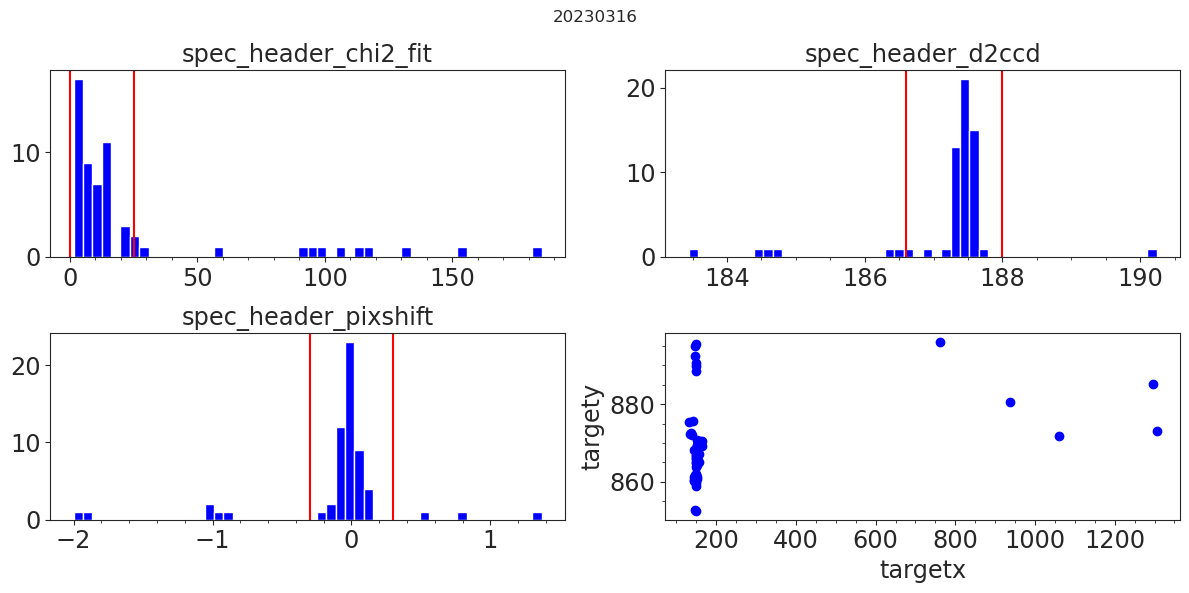

In [15]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,2)
all_names = ['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']
all_minval = [chi2_fit_min, d2ccd_min, pixshift_min ]
all_maxval = [chi2_fit_max, d2ccd_max, pixshift_max ]

for i, ax in enumerate(axes.flat):    
    if i <=2: 
        name = all_names[i]
        nbins=50
        values = df[name].values
        ax.hist(values,bins=nbins,facecolor="blue")
        ax.set_title(name)
        ax.grid()
        ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.axvline(all_minval[i],color="r")
        ax.axvline(all_maxval[i],color="r")
        
    if i == 3:
        xval=df["spec_header_targetx"].values
        yval=df["spec_header_targety"].values
        ax.scatter(xval,yval,color="blue")
        ax.set_xlabel("targetx")
        ax.set_ylabel("targety")
        ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.grid()
plt.suptitle(DATE)
plt.tight_layout()
plt.show()    

In [16]:
df_cut1 = df[['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']]
df_cut2 = df[['spec_header_targetx','spec_header_targety']]

<Figure size 1400x1400 with 0 Axes>

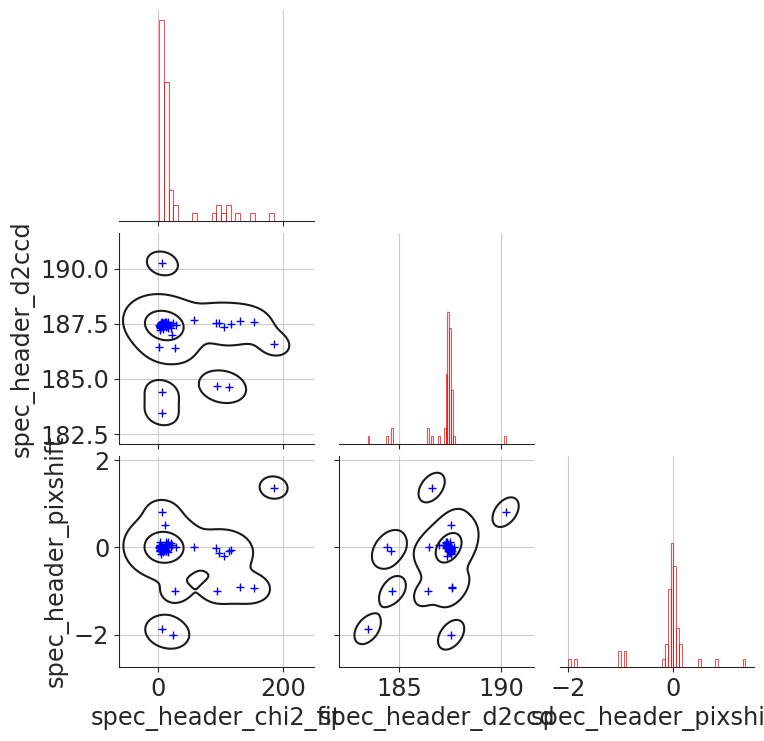

In [17]:
plt.figure(figsize=(14,14))
g=sns.pairplot(df_cut1,corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
g.map_lower(sns.kdeplot, levels=3, color=".1")
plt.show()

<Figure size 1600x1600 with 0 Axes>

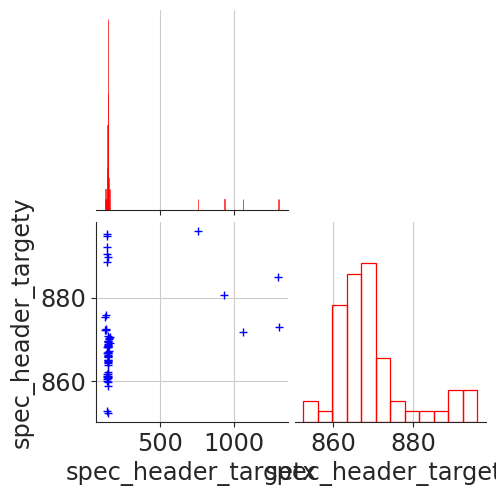

In [18]:
plt.figure(figsize=(16,16))
sns.pairplot(df_cut2,corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
plt.show()

<AxesSubplot: xlabel='exposure'>

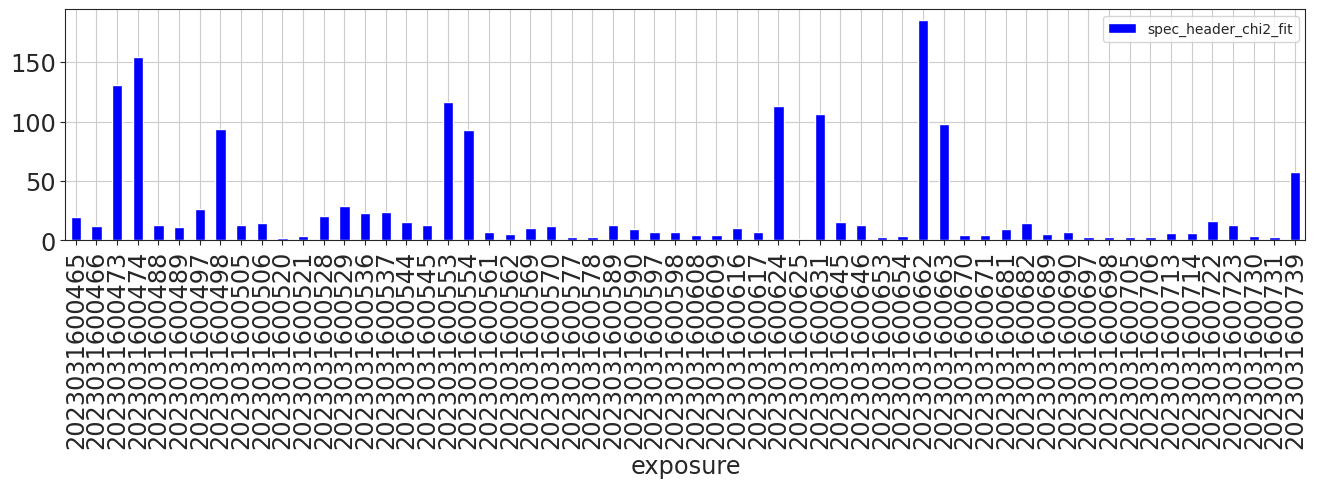

In [29]:
df.plot.bar(x="exposure", y="spec_header_chi2_fit",color="blue",figsize=(16,3))

<AxesSubplot: xlabel='exposure'>

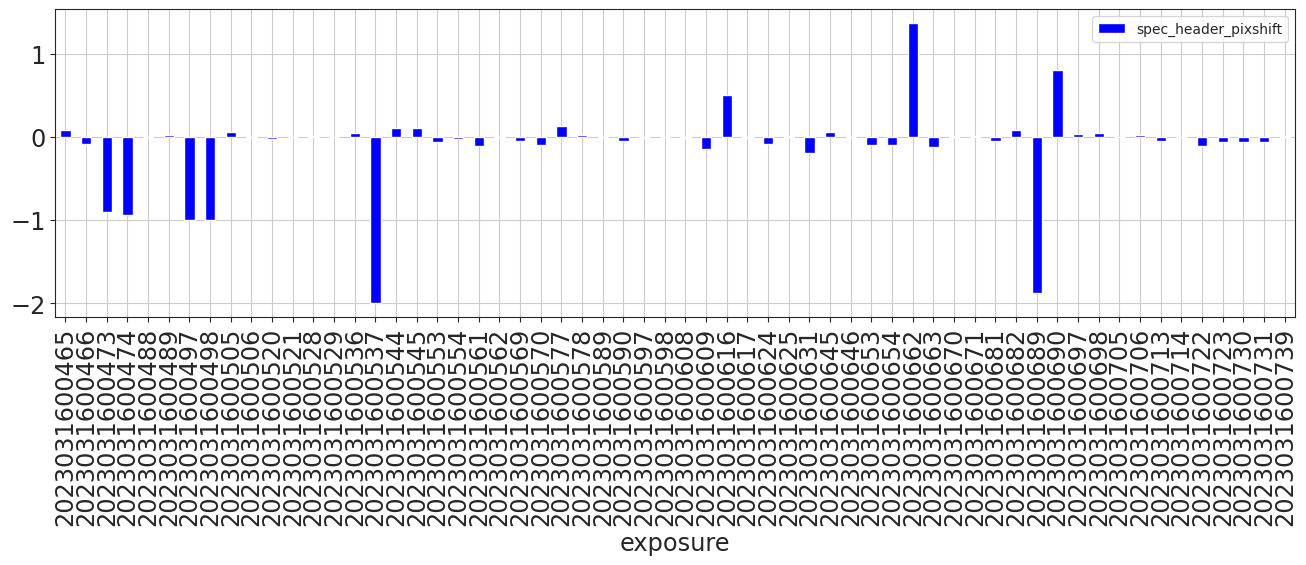

In [28]:
df.plot.bar(x="exposure", y="spec_header_pixshift",color="blue",figsize=(16,4))

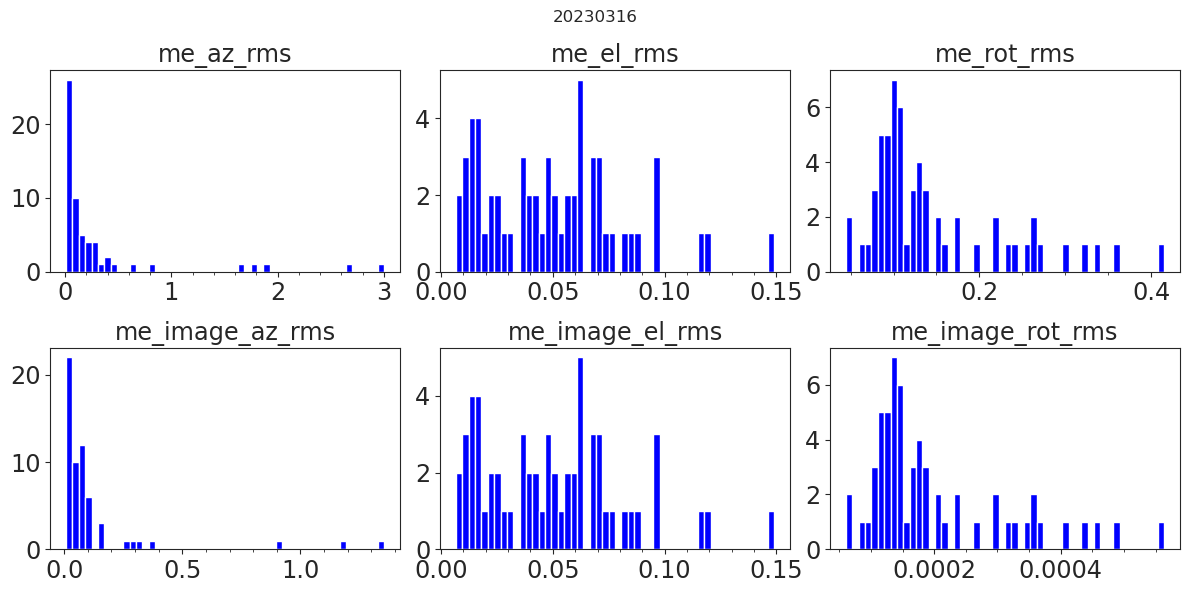

In [21]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,3)
all_names = ["me_az_rms","me_el_rms","me_rot_rms","me_image_az_rms","me_image_el_rms","me_image_rot_rms"]

for i, ax in enumerate(axes.flat):    
    name = all_names[i]
    nbins=50
    values =  df[name].values
    ax.hist(values,bins=nbins,facecolor="blue")
    ax.set_title(name)
    ax.grid()
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    
plt.suptitle(DATE)
plt.tight_layout()
plt.show()    

In [22]:
df_cut3 =df[all_names]

<Figure size 1400x1400 with 0 Axes>

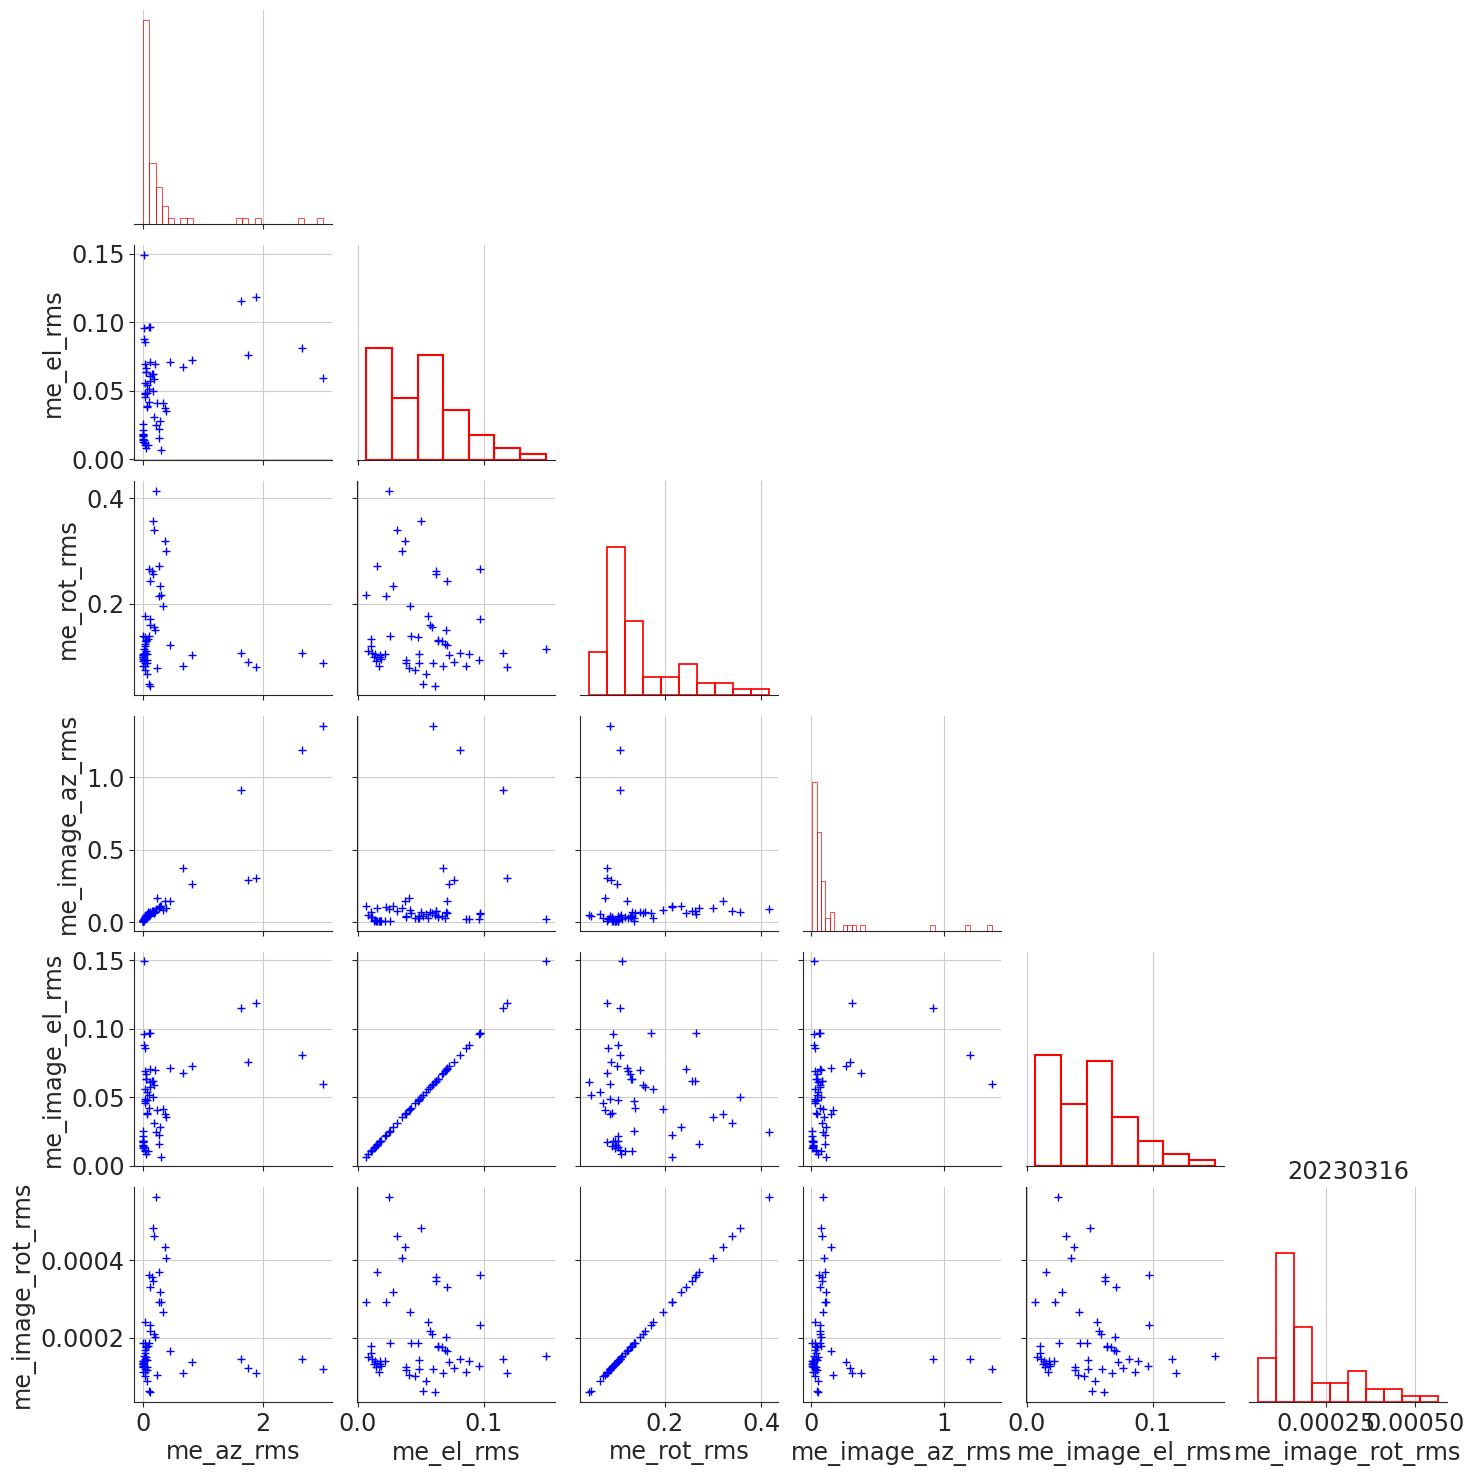

In [23]:
plt.figure(figsize=(14,14))
sns.pairplot(df_cut3,corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
plt.title(DATE)
plt.show()

# Selection of Bads and goods

In [24]:
df[~(cut1 & cut2 & cut3)]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms
2,2,2023031600473,2023-03-17T06:26:56.797507884Z,HD73495,empty,2.078695,0,0,0,70.828853,111.767216,68.279794,1,HD73495,0.000103,holo4_003,0.546366,187.621795,0.0,111.767216,147.090912,852.852863,550.000000,-9.042613e-01,1.290848e-03,469.718110,130.478204,1.0,2.078695,6.096822,2.4,2,2023-03-17T06:26:56.797507884Z,30.0,2.078695,-26.304083,70.828853,0,0,0,empty,68.279794,-418.037873,81.852863,569,1706,771,956,1137,185,2,22666.666667,-418.037873,81.852863,569,1706,771,956,2,22666.666667,1137,185,0.025879,0.149034,0.113203,0.022707,0.149034,0.000154
3,3,2023031600474,2023-03-17T06:27:39.839499093Z,HD73495,empty,2.088588,0,0,0,71.008674,111.814456,68.279948,1,HD73495,0.000103,holo4_003,0.552755,187.593677,0.0,111.814456,149.310273,852.435281,550.000000,-9.358697e-01,2.528934e-03,437.532382,154.193880,1.0,2.088588,5.874389,2.4,2,2023-03-17T06:27:39.839499093Z,30.0,2.088588,-26.304131,71.008674,0,0,0,empty,68.279948,-417.969409,82.435281,569,1706,770,955,1137,185,2,22666.666667,-417.969409,82.435281,569,1706,770,955,2,22666.666667,1137,185,0.023807,0.095927,0.094171,0.020920,0.095927,0.000128
6,6,2023031600497,2023-03-17T06:46:40.324996568Z,HD146233,empty,1.349229,0,0,0,-38.663386,-126.590051,-53.664575,1,HD146233,0.000039,holo4_003,-0.457268,186.393842,0.0,-126.590051,1296.834583,885.042582,591.927760,-1.000000e+00,3.097419e-11,282.177462,26.349361,1.0,1.349229,4.328845,2.4,2,2023-03-17T06:46:40.324996568Z,30.0,1.349229,-8.328435,-38.663386,0,0,0,empty,-53.664575,-419.814734,98.042582,1717,2000,787,969,283,182,2,22666.666667,-419.814734,98.042582,1717,2000,787,969,2,22666.666667,283,182,0.061157,0.063404,0.132042,0.041095,0.063404,0.000179
7,7,2023031600498,2023-03-17T06:47:23.301505349Z,HD146233,empty,1.346198,0,0,0,-38.483844,-126.681067,-53.664726,1,HD146233,0.000039,holo4_003,0.300327,184.665636,0.0,-126.681067,150.747249,870.745495,591.927760,-1.000994e+00,6.648903e-01,244.351720,93.662100,1.0,1.346198,3.869707,2.4,2,2023-03-17T06:47:23.301505349Z,30.0,1.346198,-8.328475,-38.483844,0,0,0,empty,-53.664726,-419.172679,87.745495,572,1708,783,968,1136,185,2,22666.666667,-419.172679,87.745495,572,1708,783,968,2,22666.666667,1136,185,0.051075,0.063538,0.130201,0.034226,0.063538,0.000177
13,13,2023031600529,2023-03-17T07:11:59.399992373Z,HD111980,empty,1.064563,0,0,0,18.283673,128.591711,50.414732,1,HD111980,0.000517,holo4_003,0.230857,187.456018,0.0,128.591711,156.401361,867.179143,579.806538,-2.454405e-07,1.709031e-01,296.112921,29.076307,1.0,1.064563,5.839085,2.4,2,2023-03-17T07:11:59.399992373Z,30.0,1.064563,-18.567292,18.283673,0,0,0,empty,50.414732,-417.913728,89.179143,574,1711,778,963,1137,185,2,22666.666667,-417.913728,89.179143,574,1711,778,963,2,22666.666667,1137,185,0.209535,0.069902,0.149501,0.071919,0.06990

In [25]:
df[(cut1 & cut2 & cut3)]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms
0,0,2023031600465,2023-03-17T06:20:56.082001145Z,HD185975,empty,2.034006,0,0,0,-107.983587,-109.385149,-69.962103,1,HD185975,-0.000065,holo4_003,0.474013,187.313525,0.0,-109.385149,149.958439,889.761747,597.257159,0.091230,1.526907,192.753849,20.028355,1.0,2.034006,6.733709,2.4,2,2023-03-17T06:20:56.082001145Z,30.0,2.034006,-87.420358,-107.983587,0,0,0,empty,-69.962103,-418.451890,83.761747,568,1704,806,991,1136,185,2,22666.666667,-418.451890,83.761747,568,1704,806,991,2,22666.666667,1136,185,0.015520,0.013880,0.103779,0.013527,0.013880,0.000141
1,1,2023031600466,2023-03-17T06:21:39.074005228Z,HD185975,empty,2.033523,0,0,0,-107.803713,-109.206969,-69.962194,1,HD185975,-0.000065,holo4_003,0.497997,187.466963,0.0,-109.206969,148.346522,888.563558,597.257159,-0.078730,0.051843,368.049307,12.354948,1.0,2.033523,6.070717,2.4,2,2023-03-17T06:21:39.074005228Z,30.0,2.033523,-87.420352,-107.803713,0,0,0,empty,-69.962194,-417.579826,83.563558,566,1703,805,990,1137,185,2,22666.666667,-417.579826,83.563558,566,1703,805,990,2,22666.666667,1137,185,0.012167,0.017075,0.082188,0.010604,0.017075,0.000112
4,4,2023031600488,2023-03-17T06:41:00.247501554Z,HD111980,empty,1.034627,0,0,0,10.525123,142.712108,35.989653,1,HD111980,0.000517,holo4_003,0.213188,187.396361,0.0,142.712108,151.456772,864.545153,579.806538,-0.001086,1.775467,225.081405,13.432725,1.0,1.034627,3.425411,2.4,2,2023-03-17T06:41:00.247501554Z,30.0,1.034627,-18.554949,10.525123,0,0,0,empty,35.989653,-417.609959,89.545153,569,1706,775,960,1137,185,2,22666.666667,-417.609959,89.545153,569,1706,775,960,2,22666.666667,1137,185,0.384949,0.035174,0.299879,0.098839,0.035174,0.000407
5,5,2023031600489,2023-03-17T06:41:43.230007703Z,HD111980,empty,1.035126,0,0,0,10.704653,142.270610,35.989356,1,HD111980,0.000517,holo4_003,0.212762,187.438158,0.0,142.270610,152.738058,864.240534,579.806538,0.029147,0.248135,290.873671,11.072264,1.0,1.035126,4.363280,2.4,2,2023-03-17T06:41:43.230007703Z,30.0,1.035126,-18.554945,10.704653,0,0,0,empty,35.989356,-417.654500,89.240534,570,1707,775,960,1137,185,2,22666.666667,-417.654500,89.240534,570,1707,775,960,2,22666.666667,1137,185,0.332198,0.041231,0.196564,0.085876,0.041231,0.000267
8,8,2023031600505,2023-03-17T06:52:06.172502735Z,HD185975,empty,2.013025,0,0,0,-100.287611,-101.748631,-77.720326,1,HD185975,-0.000065,holo4_003,0.504340,187.332328,0.0,-101.748631,148.172632,890.479481,597.257159,0.057595,0.751947,251.800815,12.741928,1.0,2.013025,4.836288,2.4,2,2023-03-17T06:52:06.172502735Z,30.0,2.013025,-87.422241,-100.287611,0,0,0,empty,-77.720326,-418.037544,83.479481,566,1702,807,992,1136,185,2,22666.666667,-418.037544,83.479481,566,1702,807,992,2,22666.666667,1136,185,0.012647,0.017662,0.103376,0.010986,0.017662,0.000140
9,9,2023031600506